# Import

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os
import timeit

from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

In [3]:
#Show all columns
pd.options.display.max_columns = None
# Update matplotlib defaults to create presentable figures 
colors = ['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', 
          '#D34100', '#FF9700', '#091D32']
mpl_update = {'font.size':16,
              'xtick.labelsize':14,'ytick.labelsize':14,
              'figure.figsize':[12.0, 8.0],
              'axes.labelsize':20, 'axes.labelcolor':'#677385',
              'axes.titlesize':20, 'lines.color':'#0055A7',
              'lines.linewidth':3, 'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

# Data

ace = absolute number of aces

df = number of double faults

svpt = total serve points

1stin = 1st serve in

1st won = points won on 1st serve

2ndwon = points won on 2nd serve

SvGms = serve games

bpSaved = break point saved

bpFaced = break point faced

In [4]:
atp=pd.read_csv("ATP.csv", dtype='str')

In [5]:
atp.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185,FRA,27.18138261,113,351,102776,1,NaN,Andrew Ilie,R,180,AUS,24.03559206,50,762,3-6 7-6(6) 7-6(4),3,R32,162,8,1,126,76,56,29,16,14,15,13,4,110,59,49,31,17,4,4
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183,CHI,19.75633128,352,76,102821,NaN,WC,Cecil Mamiit,R,173,PHI,23.84394251,139,280,6-2 7-5,3,R32,86,4,2,67,35,25,16,10,4,6,0,0,57,24,13,17,10,4,9
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185,THA,20.88158795,103,380,102205,NaN,NaN,Sebastien Lareau,R,183,CAN,27.01163587,133,293,6-1 6-3,3,R32,64,4,1,46,29,23,11,8,0,0,2,2,65,39,22,10,8,6,10
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183,NED,30.04791239,107,371,102925,8,NaN,Justin Gimelstob,R,196,USA,23.26078029,95,408,4-6 6-2 7-5,3,R32,150,8,6,109,56,43,21,15,9,12,4,6,104,57,35,24,15,6,11
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4,NaN,Jason Stoltenberg,R,185,AUS,30.0752909,74,543,101826,NaN,NaN,Alex Lopez Moron,R,175,ESP,29.42368241,111,357,6-1 6-4,3,R32,60,3,0,50,27,22,16,9,1,1,0,3,47,28,17,10,8,3,6


# Format Data with Correct Data Type

In [6]:
cat_col=['tourney_id',
 'tourney_name',
 'surface',
 'tourney_level',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ioc',
 'loser_name',
 'loser_hand',
 'loser_ioc',
 'score',
 'round']
num_col=['draw_size',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_ht',
 'winner_age',
 'winner_rank',
 'winner_rank_points',
 'loser_id',
 'loser_seed',
 'loser_entry', 
 'loser_ht',
 'loser_age',
 'loser_rank',
 'loser_rank_points',
 'best_of',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced']
date_col=['tourney_date']

In [7]:
atp[num_col] = atp[num_col].apply(pd.to_numeric, errors='coerce', axis=1)

In [8]:
atp['tourney_date']=pd.to_datetime(atp.tourney_date, format='%Y%m%d')

In [9]:
atp.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                    float64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                    float64
winner_id                    float64
winner_seed                  float64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
winner_rank                  float64
winner_rank_points           float64
loser_id                     float64
loser_seed                   float64
loser_entry                  float64
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
loser_rank                   float64
loser_rank_points            float64
s

# Reformat Data Frame

Show obeservation by player instead of by match

In [10]:
winner_cols = [col for col in atp.columns if ('winner' in col) or (col[:2]=="w_")]
loser_cols = [col for col in atp.columns if ('loser' in col) or (col[:2]=="l_")]

In [11]:
print(winner_cols)
print(loser_cols)

['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced']
['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']


In [12]:
common_cols = [col for col in atp.columns if (col not in winner_cols) and (col not in loser_cols)]

In [13]:
print(common_cols)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']


In [14]:
w_cols=winner_cols + common_cols
l_cols=loser_cols + common_cols
print(w_cols)
print(l_cols)

['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']
['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']


In [15]:
w_df=atp[w_cols]
w_df=w_df.rename(columns=lambda x: x.replace('winner', 'player'))
w_df=w_df.rename(columns=lambda x: x.replace('w_', ''))
w_df=w_df.rename(columns={'drasize':'draw_size'})
w_df=w_df.assign(result=1) #add results
w_df

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_rank,player_rank_points,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,result
0,102179.0,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,1.0,3-6 7-6(6) 7-6(4),3.0,R32,162.0,1
1,103602.0,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,2.0,6-2 7-5,3.0,R32,86.0,1
2,103387.0,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,3.0,6-1 6-3,3.0,R32,64.0,1
3,101733.0,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,4.0,4-6 6-2 7-5,3.0,R32,150.0,1
4,101727.0,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,5.0,6-1 6-4,3.0,R32,60.0,1
5,103181.0,NaN,NaN,Jiri Vanek,R,185.0,CZE,22.020534,92.0,429.0,9.0,4.0,95.0,60.0,43.0,26.0,16.0,5.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,6.0,6-7(2) 6-4 6-3,3.0,R32,115.0,1
6,101675.0,NaN,NaN,Martin Rodriguez,R,178.0,ARG,30.368241,120.0,322.0,4.0,11.0,148.0,65.0,54.0,43.0,18.0,9.0,12.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,7.0,6-7(7) 7-6(2) 7-6(3),3.0,R32,171.0,1
7,102834.0,5.0,NaN,Paul Goldstein,R,178.0,USA,23.739904,79.0,516.0,1.0,1.0,42.0,23.0,19.0,13.0,8.0,0.0,0.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,8.0,6-2 6-1,3.0,R32,66.0,1
8,103454.0,6.0,NaN,Nicolas Massu,R,183.0,CHI,20.558522,89.0,464.0,2.0,2.0,49.0,30.0,26.0,10.0,9.0,3.0,4.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,9.0,6-2 6-3,3.0,R32,63.0,1
9,102466.0,NaN,NaN,Jan Kroslak,R,188.0,SVK,25.538672,125.0,315.0,7.0,2.0,83.0,55.0,42.0,14.0,14.0,3.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,10.0,6-1 3-6 7-6(4),3.0,R32,123.0,1


In [16]:
l_df=atp[l_cols]
l_df=l_df.rename(columns=lambda x: x.replace('loser', 'player'))
l_df=l_df.rename(columns=lambda x: x.replace('l_', ''))
l_df=l_df.assign(result=0) #add results
l_df

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_rank,player_rank_points,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,result
0,102776.0,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,1.0,3-6 7-6(6) 7-6(4),3.0,R32,162.0,0
1,102821.0,NaN,NaN,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,2.0,6-2 7-5,3.0,R32,86.0,0
2,102205.0,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,3.0,6-1 6-3,3.0,R32,64.0,0
3,102925.0,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,4.0,4-6 6-2 7-5,3.0,R32,150.0,0
4,101826.0,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,5.0,6-1 6-4,3.0,R32,60.0,0
5,101885.0,NaN,NaN,Wayne Arthurs,L,190.0,AUS,29.122519,102.0,381.0,11.0,8.0,94.0,48.0,31.0,29.0,15.0,6.0,9.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,6.0,6-7(2) 6-4 6-3,3.0,R32,115.0,0
6,102455.0,NaN,NaN,Lorenzo Manta,R,190.0,SUI,25.623546,112.0,356.0,5.0,5.0,126.0,70.0,45.0,36.0,18.0,3.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,7.0,6-7(7) 7-6(2) 7-6(3),3.0,R32,171.0,0
7,101086.0,NaN,NaN,Ronald Agenor,R,180.0,USA,35.463381,91.0,430.0,0.0,0.0,42.0,25.0,9.0,10.0,7.0,3.0,7.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,8.0,6-2 6-1,3.0,R32,66.0,0
8,102133.0,NaN,NaN,Laurence Tieleman,R,180.0,ITA,27.460643,97.0,404.0,2.0,3.0,47.0,25.0,13.0,10.0,8.0,3.0,7.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,9.0,6-2 6-3,3.0,R32,63.0,0
9,102966.0,NaN,NaN,Fredrik Jonsson,R,193.0,SWE,23.093771,117.0,342.0,3.0,2.0,102.0,62.0,43.0,14.0,14.0,9.0,13.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,10.0,6-1 3-6 7-6(4),3.0,R32,123.0,0


In [17]:
#create relative features
w_df['player_ht_diff']=w_df['player_ht']-l_df['player_ht']
w_df['player_age_diff']=w_df['player_age']-l_df['player_age']
w_df['player_rank_diff']=w_df['player_rank']-l_df['player_rank']
w_df['player_rank_points_diff']=w_df['player_rank_points']-l_df['player_rank_points']

l_df['player_ht_diff']=l_df['player_ht']-w_df['player_ht']
l_df['player_age_diff']=l_df['player_age']-w_df['player_age']
l_df['player_rank_diff']=l_df['player_rank']-w_df['player_rank']
l_df['player_rank_points_diff']=l_df['player_rank_points']-w_df['player_rank_points']

In [18]:
atp=w_df.append(l_df)
atp.head()

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_rank,player_rank_points,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,result,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff
0,102179.0,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,1.0,3-6 7-6(6) 7-6(4),3.0,R32,162.0,1,5.0,3.145791,63.0,-411.0
1,103602.0,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,2.0,6-2 7-5,3.0,R32,86.0,1,10.0,-4.087611,213.0,-204.0
2,103387.0,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,3.0,6-1 6-3,3.0,R32,64.0,1,2.0,-6.130048,-30.0,87.0
3,101733.0,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,4.0,4-6 6-2 7-5,3.0,R32,150.0,1,-13.0,6.787132,12.0,-37.0
4,101727.0,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,5.0,6-1 6-4,3.0,R32,60.0,1,10.0,0.651608,-37.0,186.0


# EDA and Plots

In [19]:
atp.describe()

,player_id,player_seed,player_ht,player_age,player_rank,player_rank_points,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,draw_size,match_num,best_of,minutes,result,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff
count,112930.000000,36205.000000,102133.000000,112869.000000,110012.000000,110012.00000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,101336.000000,112930.000000,112930.000000,112930.000000,98836.000000,112930.000000,95832.000000,1.128080e+05,108768.000000,108768.000000
mean,104306.822510,7.828753,185.439505,26.161132,102.346280,1221.21195,5.942321,3.018276,79.074376,47.664719,33.890414,15.880052,12.211475,4.113879,6.838182,53.485292,49.228991,3.476472,104.609171,0.500000,0.000000,-4.080922e-16,0.000000,0.000000
std,3882.367025,6.931070,6.848602,3.802051,173.256933,1629.17694,5.231054,2.436179,29.240851,19.000890,14.047908,7.217628,4.313970,3.238872,4.465830,39.123596,75.562494,0.852012,40.610842,0.500002,9.506265,5.113874e+00,173.544941,2086.251905
min,100644.000000,1.000000,163.000000,14.513347,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,3.000000,0.000000,0.000000,-45.000000,-2.592197e+01,-2125.000000,-16641.000000
25%,103252.000000,3.000000,180.000000,23.403149,26.000000,462.00000,2.000000,1.000000,58.000000,34.000000,24.000000,11.000000,9.000000,2.000000,4.000000,32.000000,8.000000,3.000000,75.000000,0.000000,-5.000000,-3.479808e+00,-44.000000,-518.000000
50%,103990.000000,6.000000,185.000000,26.072553,57.000000,761.00000,5.000000,3.000000,74.000000,44.000000,32.000000,15.000000,11.000000,4.000000,6.000000,32.000000,21.000000,3.000000,97.000000,0.500000,0.000000,0.000000e+00,0.000000,0.000000
75%,104755.000000,10.000000,190.000000,28.793977,101.000000,1295.00000,8.000000,4.000000,95.000000,58.000000,41.000000,20.000000,15.000000,6.000000,9.000000,64.000000,46.000000,3.000000,126.000000,1.000000,5.000000,3.479808e+00,44.000000,518.000000
max,207973.000000,35.000000,208.000000,46.036961,2159.000000,16950.00000,113.000000,23.000000,491.000000,361.000000,292.000000,101.000000,91.000000,25.000000,34.000000,128.000000,701.000000,5.000000,1146.000000,1.000000,45.000000,2.592197e+01,2125.000000,16641.000000


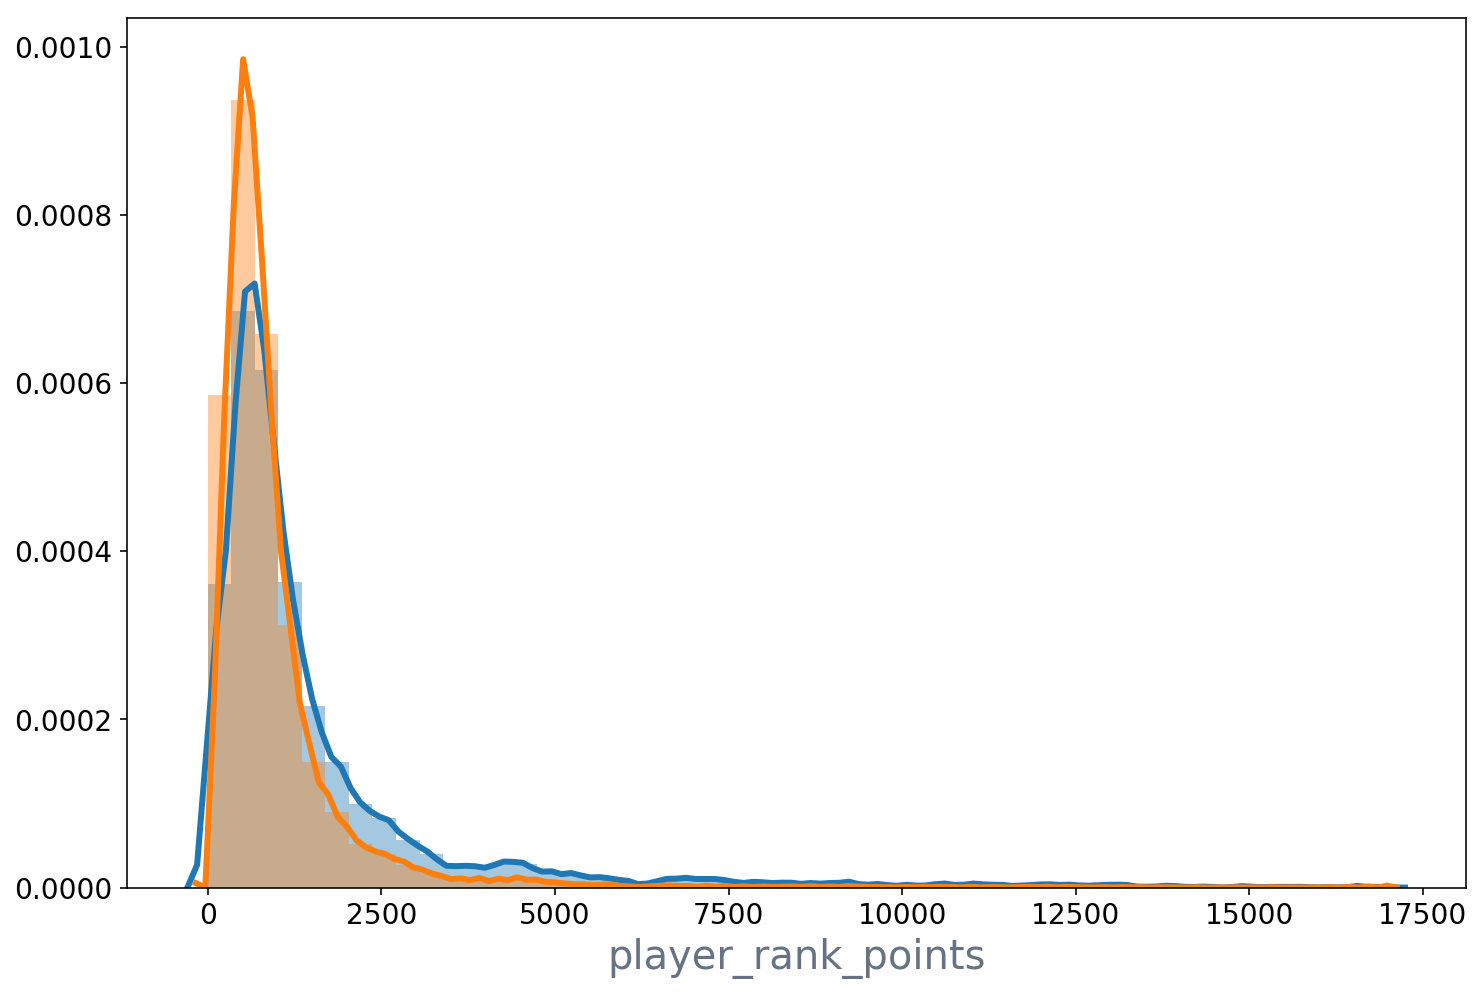

In [20]:
sns.distplot(atp[atp['result'] == 1].player_rank_points.dropna())
sns.distplot(atp[atp['result'] == 0].player_rank_points.dropna())

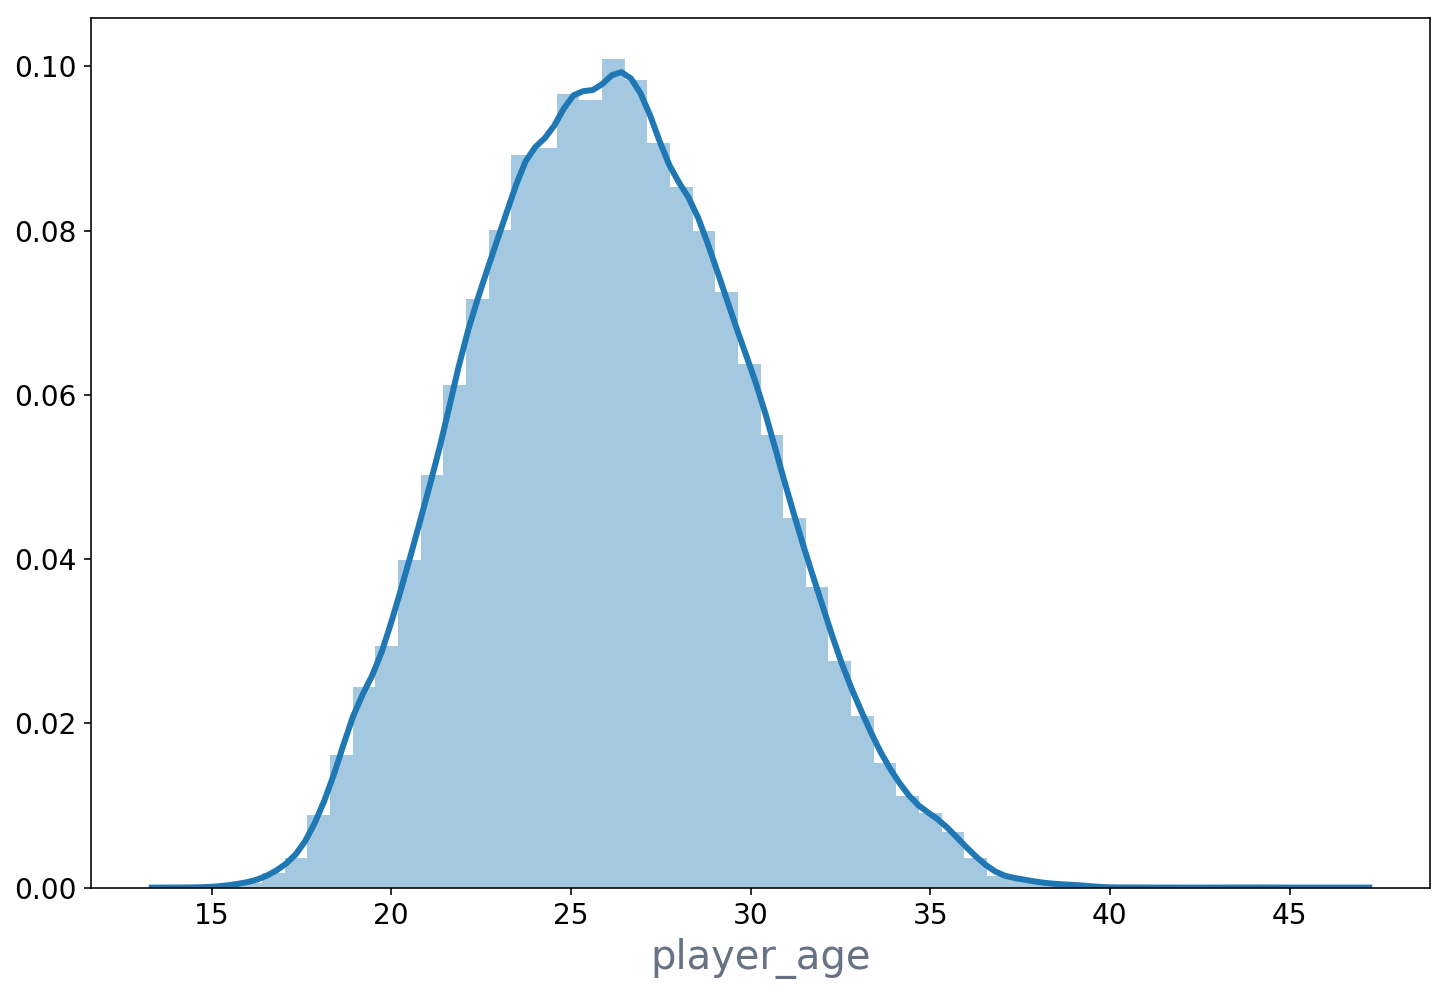

In [21]:
sns.distplot(atp.player_age.dropna())

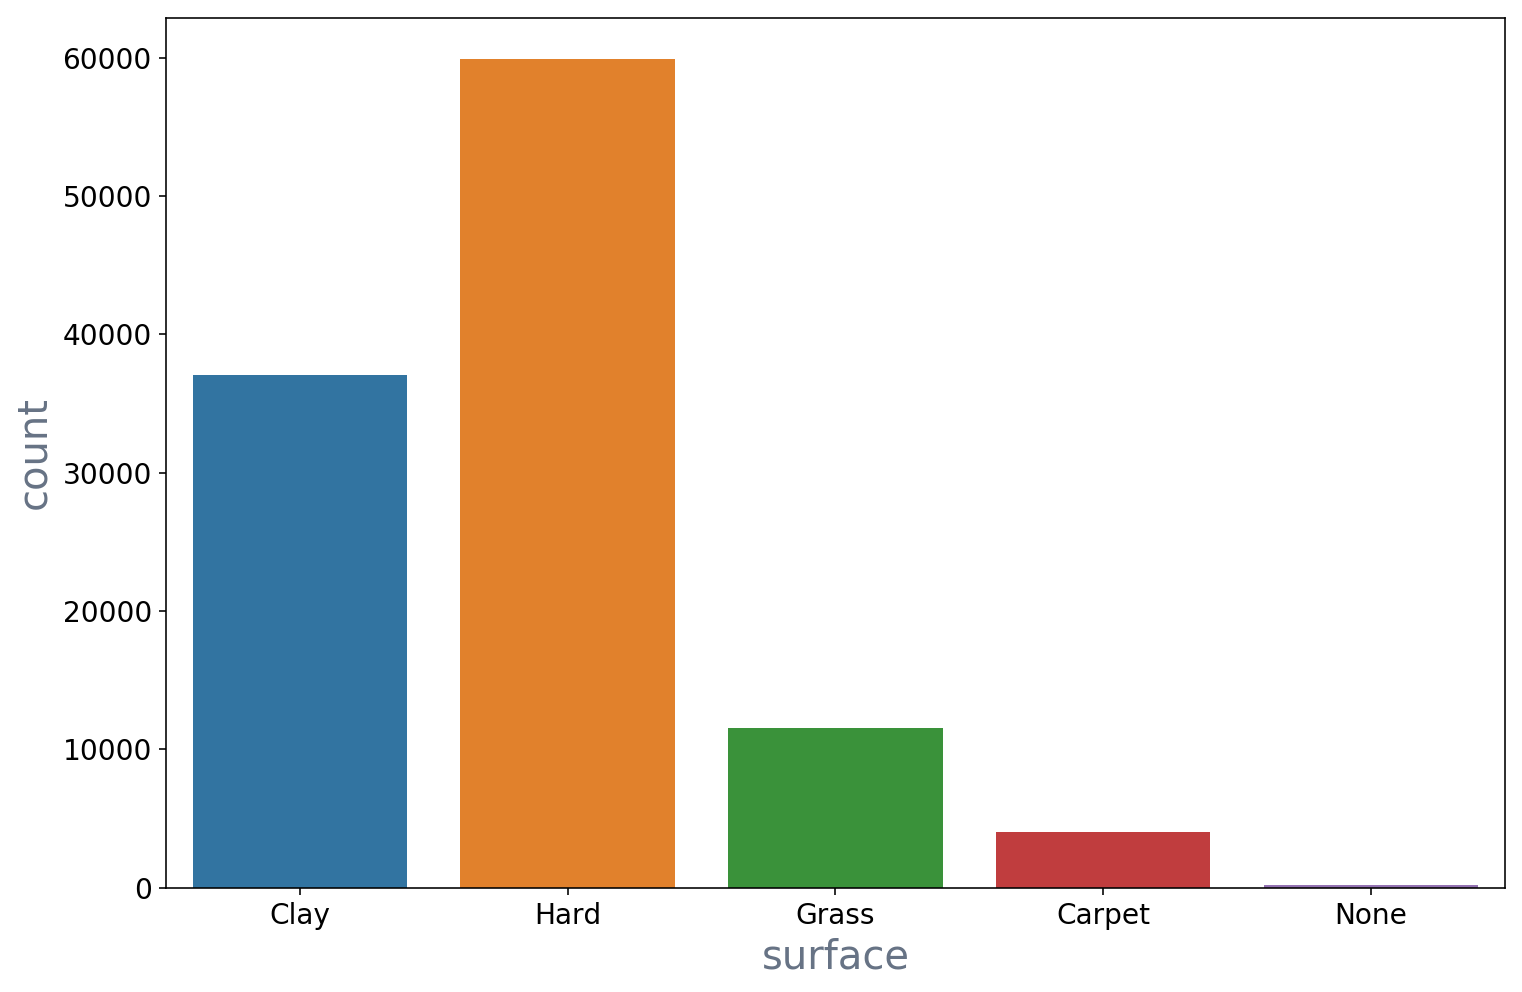

In [22]:
sns.countplot(x="surface",data=atp)

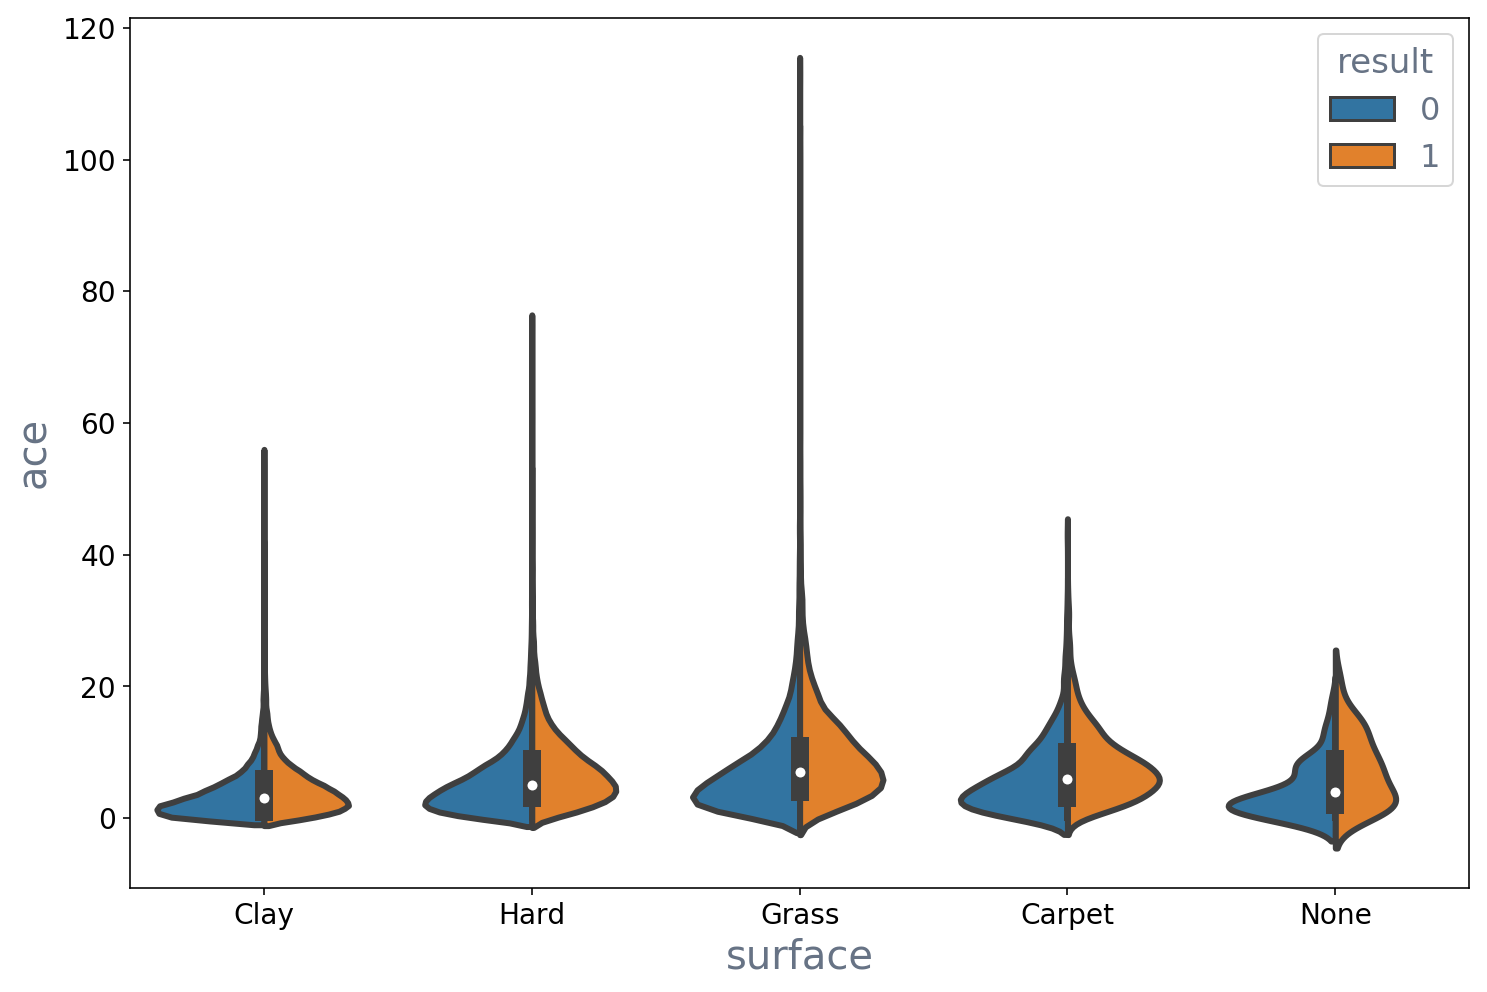

In [23]:
sns.violinplot(x="surface", y="ace", hue="result",split=True, data=atp)

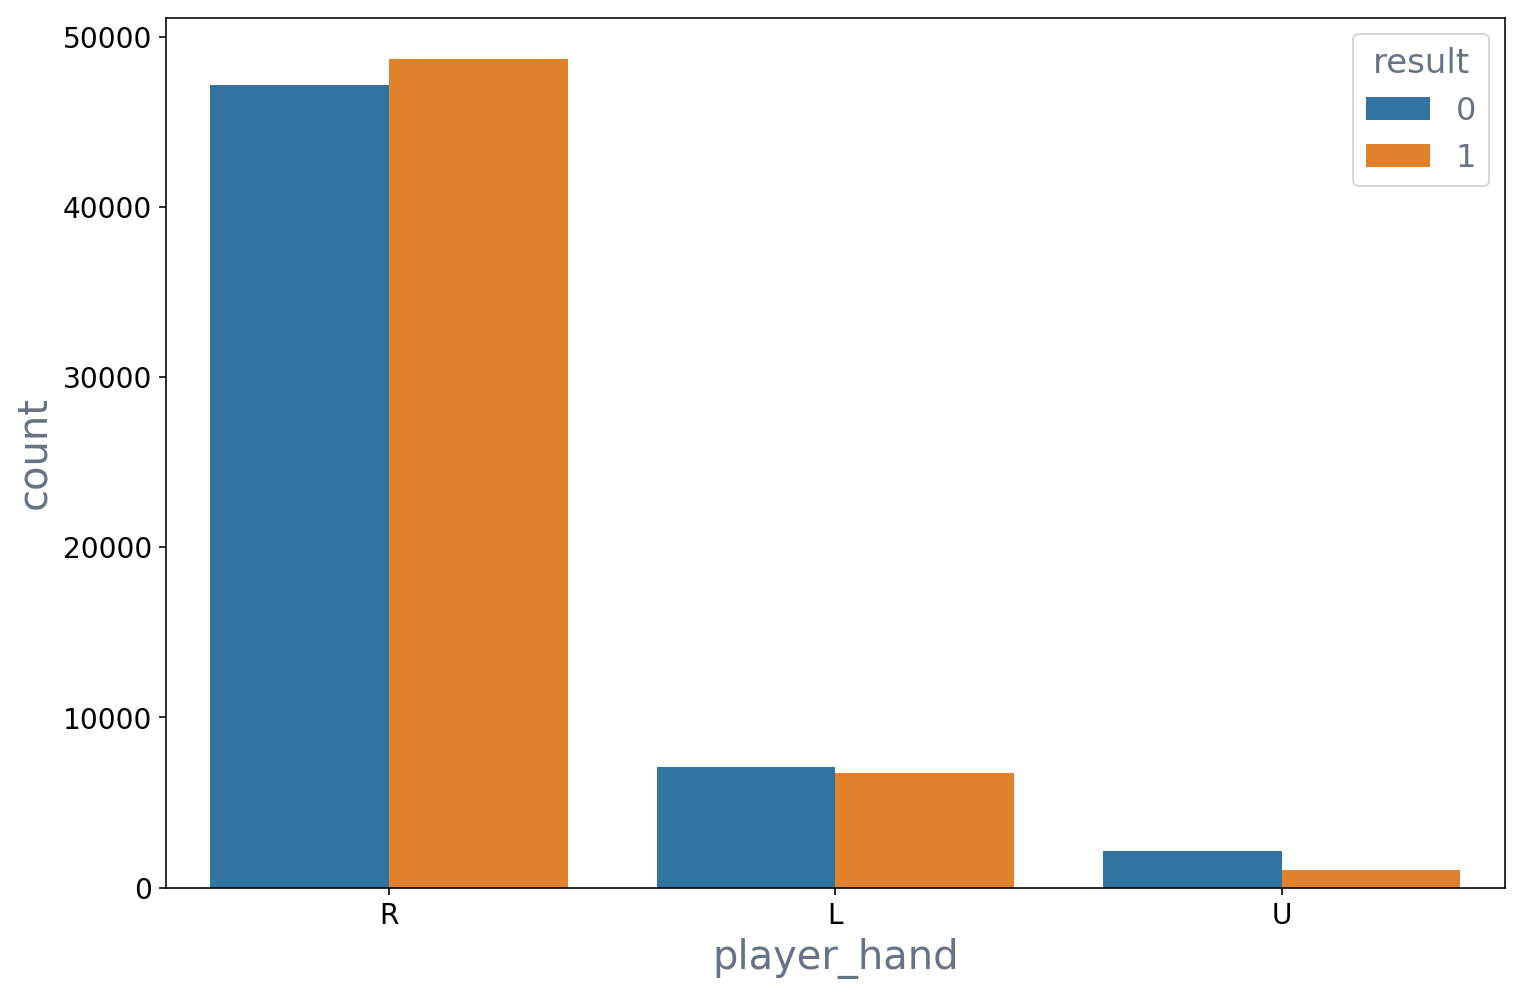

In [24]:
sns.countplot(x="player_hand",hue="result",data=atp)

In [25]:
atp.isnull().sum()

player_id                       0
player_seed                 76725
player_entry               106308
player_name                     0
player_hand                    58
player_ht                   10797
player_ioc                      0
player_age                     61
player_rank                  2918
player_rank_points           2918
ace                         11594
df                          11594
svpt                        11594
1stIn                       11594
1stWon                      11594
2ndWon                      11594
SvGms                       11594
bpSaved                     11594
bpFaced                     11594
tourney_id                      0
tourney_name                    0
surface                       236
draw_size                       0
tourney_level                   0
tourney_date                    0
match_num                       0
score                           2
best_of                         0
round                           0
minutes       

In [26]:
atp_clean=atp[atp.ace.notnull()]

In [27]:
atp_clean.isnull().sum()

player_id                      0
player_seed                65703
player_entry               94778
player_name                    0
player_hand                   33
player_ht                   6243
player_ioc                     0
player_age                    28
player_rank                 1421
player_rank_points          1421
ace                            0
df                             0
svpt                           0
1stIn                          0
1stWon                         0
2ndWon                         0
SvGms                          0
bpSaved                        0
bpFaced                        0
tourney_id                     0
tourney_name                   0
surface                        0
draw_size                      0
tourney_level                  0
tourney_date                   0
match_num                      0
score                          0
best_of                        0
round                          0
minutes                     2680
result    

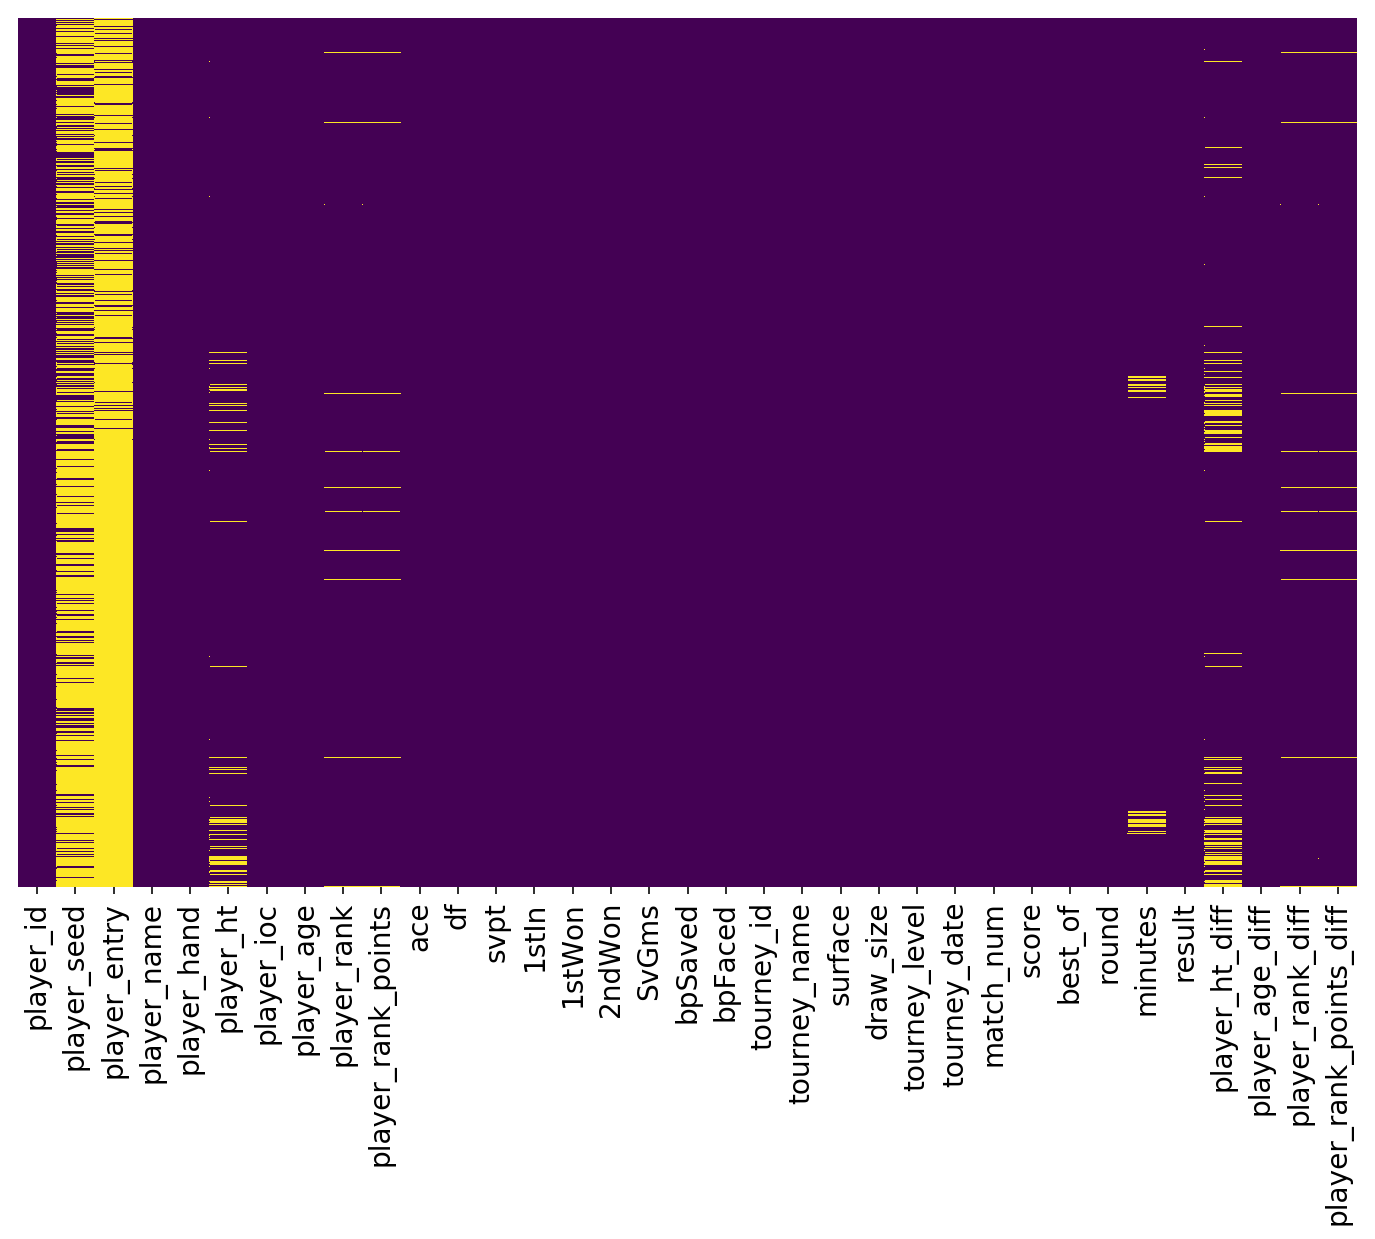

In [28]:
sns.heatmap(atp_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Feature Engineering

In [29]:
atp_clean.columns

Index(['player_id', 'player_seed', 'player_entry', 'player_name',
       'player_hand', 'player_ht', 'player_ioc', 'player_age', 'player_rank',
       'player_rank_points', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon',
       'SvGms', 'bpSaved', 'bpFaced', 'tourney_id', 'tourney_name', 'surface',
       'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score',
       'best_of', 'round', 'minutes', 'result', 'player_ht_diff',
       'player_age_diff', 'player_rank_diff', 'player_rank_points_diff'],
      dtype='object')

In [30]:
temp = pd.get_dummies(atp_clean.player_hand)
temp=temp.rename(columns={'L':'player_hand_l','R':'player_hand_r','U':'player_hand_u'})
temp.head()

,player_hand_l,player_hand_r,player_hand_u
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [31]:
temp1 = pd.get_dummies(atp_clean.surface)
temp1=temp1.rename(columns={'Carpet':'surface_carpet','Clay':'surface_clay','Grass':'surface_grass','Hard':'surface_hard'})
temp1.head()

,surface_carpet,surface_clay,surface_grass,surface_hard,None
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [32]:
temp2 = pd.get_dummies(atp_clean.tourney_level)
temp2=temp2.rename(columns={'A':'tourney_level_A','C':'tourney_level_C','D':'tourney_level_D','F':'tourney_level_F','G':'tourney_level_G','M':'tourney_level_M'})
temp2.head()

,tourney_level_A,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [33]:
atp_clean=pd.concat([atp_clean, temp, temp1, temp2], axis=1, join='inner')

In [34]:
atp_clean.columns

Index(['player_id', 'player_seed', 'player_entry', 'player_name',
       'player_hand', 'player_ht', 'player_ioc', 'player_age', 'player_rank',
       'player_rank_points', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon',
       'SvGms', 'bpSaved', 'bpFaced', 'tourney_id', 'tourney_name', 'surface',
       'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score',
       'best_of', 'round', 'minutes', 'result', 'player_ht_diff',
       'player_age_diff', 'player_rank_diff', 'player_rank_points_diff',
       'player_hand_l', 'player_hand_r', 'player_hand_u', 'surface_carpet',
       'surface_clay', 'surface_grass', 'surface_hard', 'None',
       'tourney_level_A', 'tourney_level_C', 'tourney_level_D',
       'tourney_level_F', 'tourney_level_G', 'tourney_level_M'],
      dtype='object')

# Use Pregame Info Only

In [90]:
atp_pre=atp_clean[['player_hand_l','player_hand_u',
                 'player_ht_diff','player_age_diff', 'player_rank_diff', 'player_rank_points_diff',
                 'surface_carpet', 'surface_clay','surface_grass','surface_hard',
                 'tourney_level_A', 'tourney_level_C','tourney_level_D', 'tourney_level_F', 'tourney_level_G','tourney_level_M','result']]
#'player_ht', 'player_age', 'player_rank', 'player_rank_points', 

In [36]:
atp_pre.columns

Index(['player_hand_l', 'player_hand_u', 'player_ht_diff', 'player_age_diff',
       'player_rank_diff', 'player_rank_points_diff', 'surface_carpet',
       'surface_clay', 'surface_grass', 'tourney_level_A', 'tourney_level_C',
       'tourney_level_D', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'result'],
      dtype='object')

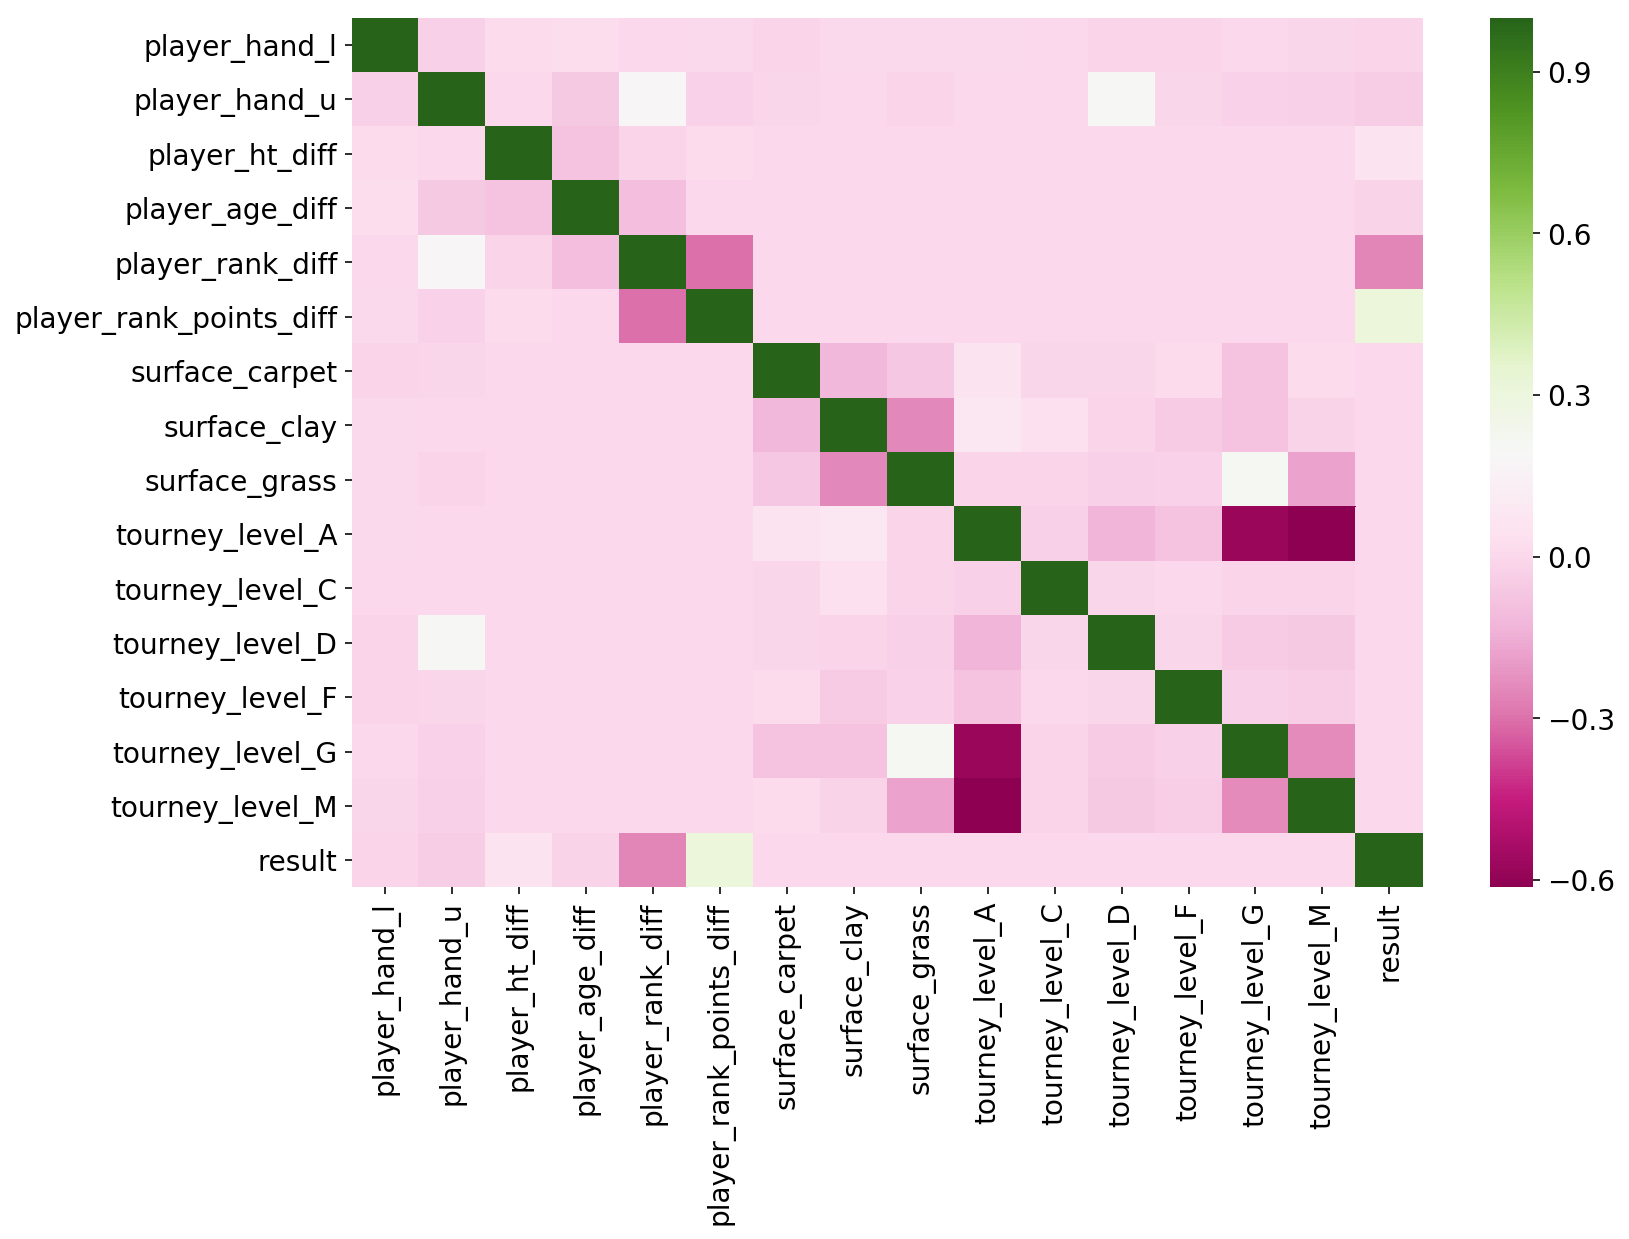

In [37]:
sns.heatmap(atp_pre.corr(),cmap="PiYG")

In [38]:
atp_pre.corr()

,player_hand_l,player_hand_u,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_carpet,surface_clay,surface_grass,tourney_level_A,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,result
player_hand_l,1.000000,-0.029839,1.101126e-02,2.096290e-02,1.955629e-03,4.274330e-03,-1.388887e-02,5.166522e-03,8.385698e-03,9.037868e-03,1.646113e-03,-1.445073e-02,-9.520009e-03,1.539504e-04,-5.836172e-03,-1.399704e-02
player_hand_u,-0.029839,1.000000,9.888290e-04,-5.463123e-02,1.758514e-01,-2.185264e-02,-7.937514e-03,1.003101e-03,-1.193962e-02,3.486832e-04,3.327036e-03,2.001427e-01,-5.272384e-03,-2.305128e-02,-3.114324e-02,-4.476064e-02
player_ht_diff,0.011011,0.000989,1.000000e+00,-7.896215e-02,-1.057090e-02,1.273410e-02,-5.748765e-18,1.497712e-16,1.204360e-16,-5.480722e-17,6.062144e-17,2.062279e-17,-5.143553e-18,5.474501e-17,-1.472845e-16,4.866760e-02
player_age_diff,0.020963,-0.054631,-7.896215e-02,1.000000e+00,-9.604504e-02,1.803918e-03,3.479643e-17,3.306687e-20,-4.850239e-17,2.613774e-17,6.567976e-17,-1.425627e-16,-1.885354e-18,-2.953938e-17,8.324045e-17,-2.023699e-02
player_rank_diff,0.001956,0.175851,-1.057090e-02,-9.604504e-02,1.000000e+00,-3.023500e-01,1.706237e-16,-1.350524e-17,-1.350777e-17,1.900509e-16,-7.194682e-17,2.256133e-15,1.392452e-16,-2.861033e-17,2.910783e-16,-2.482937e-01
player_rank_points_diff,0.004274,-0.021853,1.273410e-02,1.803918e-03,-3.023500e-01,1.000000e+00,1.790405e-16,-5.558293e-18,-1.955738e-17,-1.941228e-16,5.876991e-17,8.707955e-18,1.065791e-16,-1.009805e-15,-1.439665e-16,3.090867e-01
surface_carpet,-0.013889,-0.007938,-5.748765e-18,3.479643e-17,1.706237e-16,1.790405e-16,1.000000e+00,-1.181874e-01,-5.983468e-02,5.321750e-02,-4.149506e-03,-6.288963e-03,1.507155e-02,-8.052843e-02,1.197985e-02,-2.809389e-18
surface_clay,0.005167,0.001003,1.497712e-16,3.306687e-20,-1.350524e-17,-5.558293e-18,-1.181874e-01,1.000000e+00,-2.433190e-01,8.570464e-02,3.510956e-02,-1.474044e-02,-4.681467e-02,-7.872765e-02,-1.923849e-02,1.315003e-18
surface_grass,0.008386,-0.011940,1.204360e-16,-4.850239e-17,-1.350777e-17,-1.955738e-17,-5.983468e-02,-2.433190e-01,1.000000e+00,-9.738682e-03,-8.542821e-03,-2.867636e-02,-2.370085e-02,2.070919e-01,-1.756986e-01,2.375353e-19
tourney_level_A,0.009038,0.000349,-5.480722e-17,2.613774e-17,1.900509e-16,-1.941228e-16,5.321750e-02,8.570464e-02,-9.738682e-03,1.000000e+00,-2.983641e-02,-1.330536e-01,-8.277692e-02,-5.790279e-01,-6.136398e-01,1.306260e-18


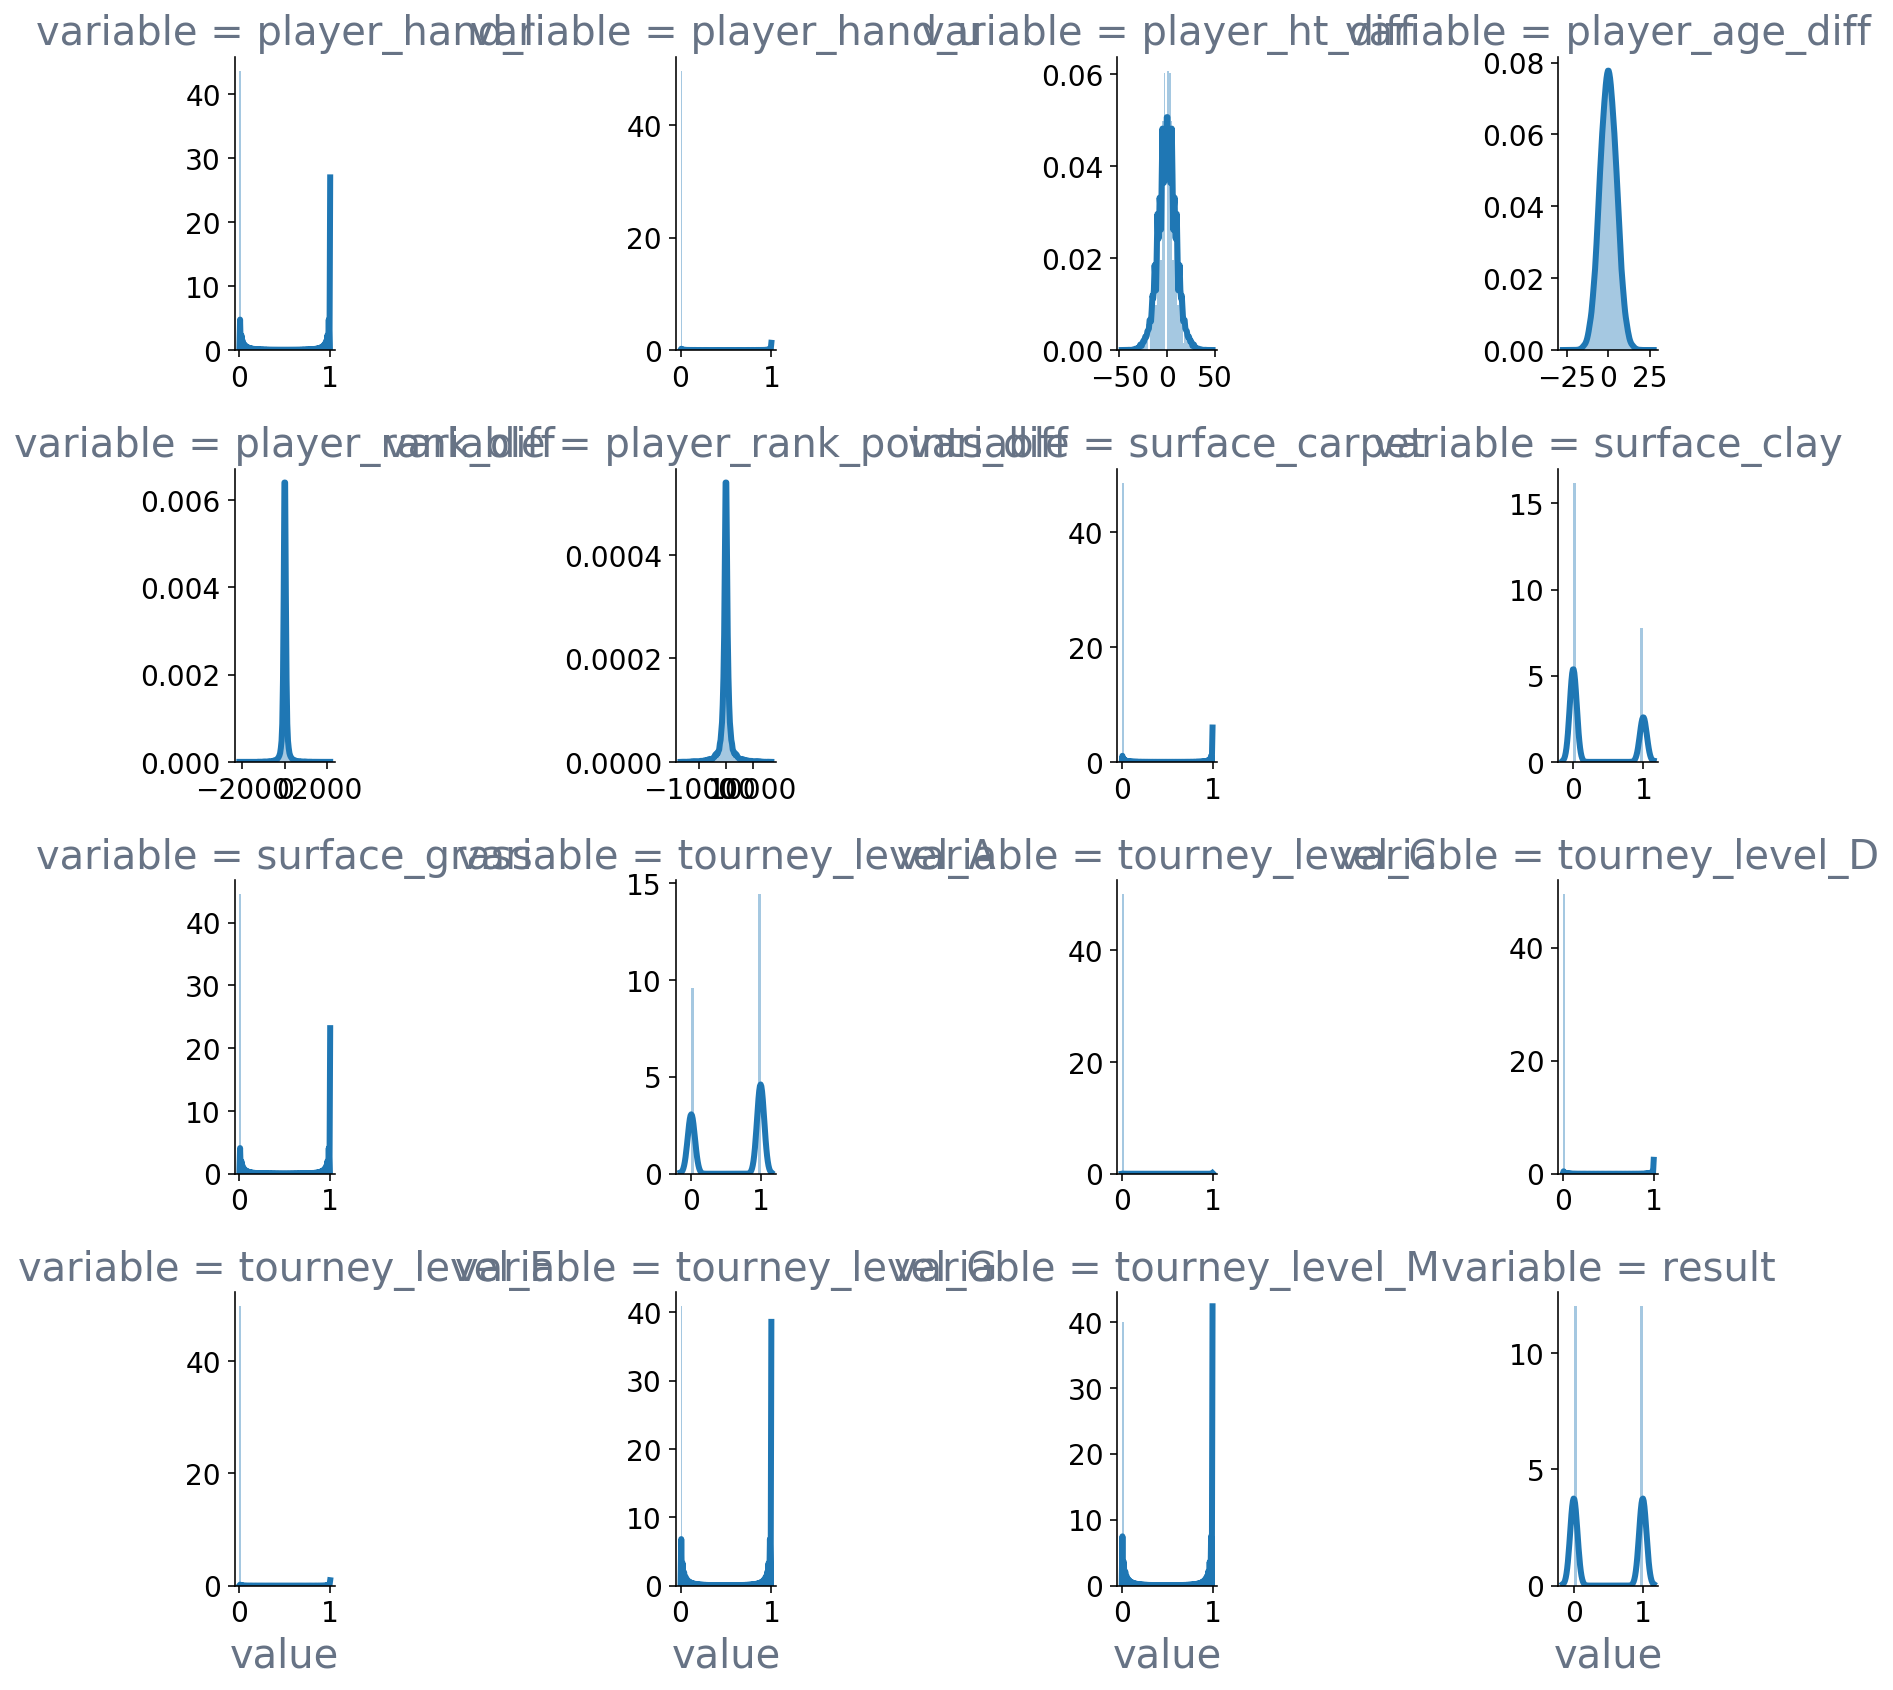

In [39]:
num = atp_pre.select_dtypes(include=[np.number])
g = sns.FacetGrid(pd.melt(atp_pre, value_vars = num.columns), col='variable', col_wrap=4, sharex=False, sharey = False)
g.map(sns.distplot, 'value')

In [91]:
atp_pre_dropna = atp_pre.dropna(axis=0, how='any')

In [41]:
atp_pre_dropna.describe()

,player_hand_l,player_hand_u,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_carpet,surface_clay,surface_grass,tourney_level_A,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,result
count,89116.000000,89116.000000,89116.000000,8.911600e+04,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000
mean,0.126229,0.000011,0.000000,1.605411e-15,0.000000,0.000000,0.031734,0.326720,0.112236,0.591588,0.000426,0.002020,0.005162,0.188047,0.212756,0.500000
std,0.332109,0.003350,9.514322,4.800254e+00,116.373407,2160.978377,0.175292,0.469017,0.315658,0.491543,0.020645,0.044897,0.071660,0.390752,0.409259,0.500003
min,0.000000,0.000000,-45.000000,-1.946886e+01,-1669.000000,-16641.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-5.000000,-3.321013e+00,-39.000000,-551.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,5.000000,3.321013e+00,39.000000,551.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,45.000000,1.946886e+01,1669.000000,16641.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
atp_pre_dropna.drop(['player_hand_l','player_hand_u', 'surface_carpet','tourney_level_C','tourney_level_D','tourney_level_F'],axis=1).to_csv("train_data")

In [92]:
#X = atp_pre_dropna.drop(['result'], axis=1)a
X = atp_pre_dropna.drop(['player_hand_l','player_hand_u', 'surface_carpet','tourney_level_C','tourney_level_D','tourney_level_F','result'],axis=1)
y = atp_pre_dropna['result']
X.head()

,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_clay,surface_grass,surface_hard,tourney_level_A,tourney_level_G,tourney_level_M
0,5.0,3.145791,63.0,-411.0,1,0,0,1,0,0
1,10.0,-4.087611,213.0,-204.0,1,0,0,1,0,0
2,2.0,-6.130048,-30.0,87.0,1,0,0,1,0,0
3,-13.0,6.787132,12.0,-37.0,1,0,0,1,0,0
4,10.0,0.651608,-37.0,186.0,1,0,0,1,0,0


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [94]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(logreg, X, y, cv=10)
metrics.accuracy_score(y, predicted) 

0.6545401499169622

In [86]:
predicted

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.cross_validation import cross_val_score
accuracy = cross_val_score(logreg, X, y, cv=10,scoring='accuracy')
accuracy
cross_val_score(logreg, X, y, cv=10,scoring='accuracy').mean()

0.6532840271858824

In [162]:
from nltk import ConfusionMatrix 
print (ConfusionMatrix(list(y), list(predicted)))

  |     0     1 |
--+-------------+
0 |<28080>14844 |
1 | 14847<28077>|
--+-------------+
(row = reference; col = test)



In [163]:
# sensitivity:
metrics.recall_score(y, predicted)

0.65410958904109584

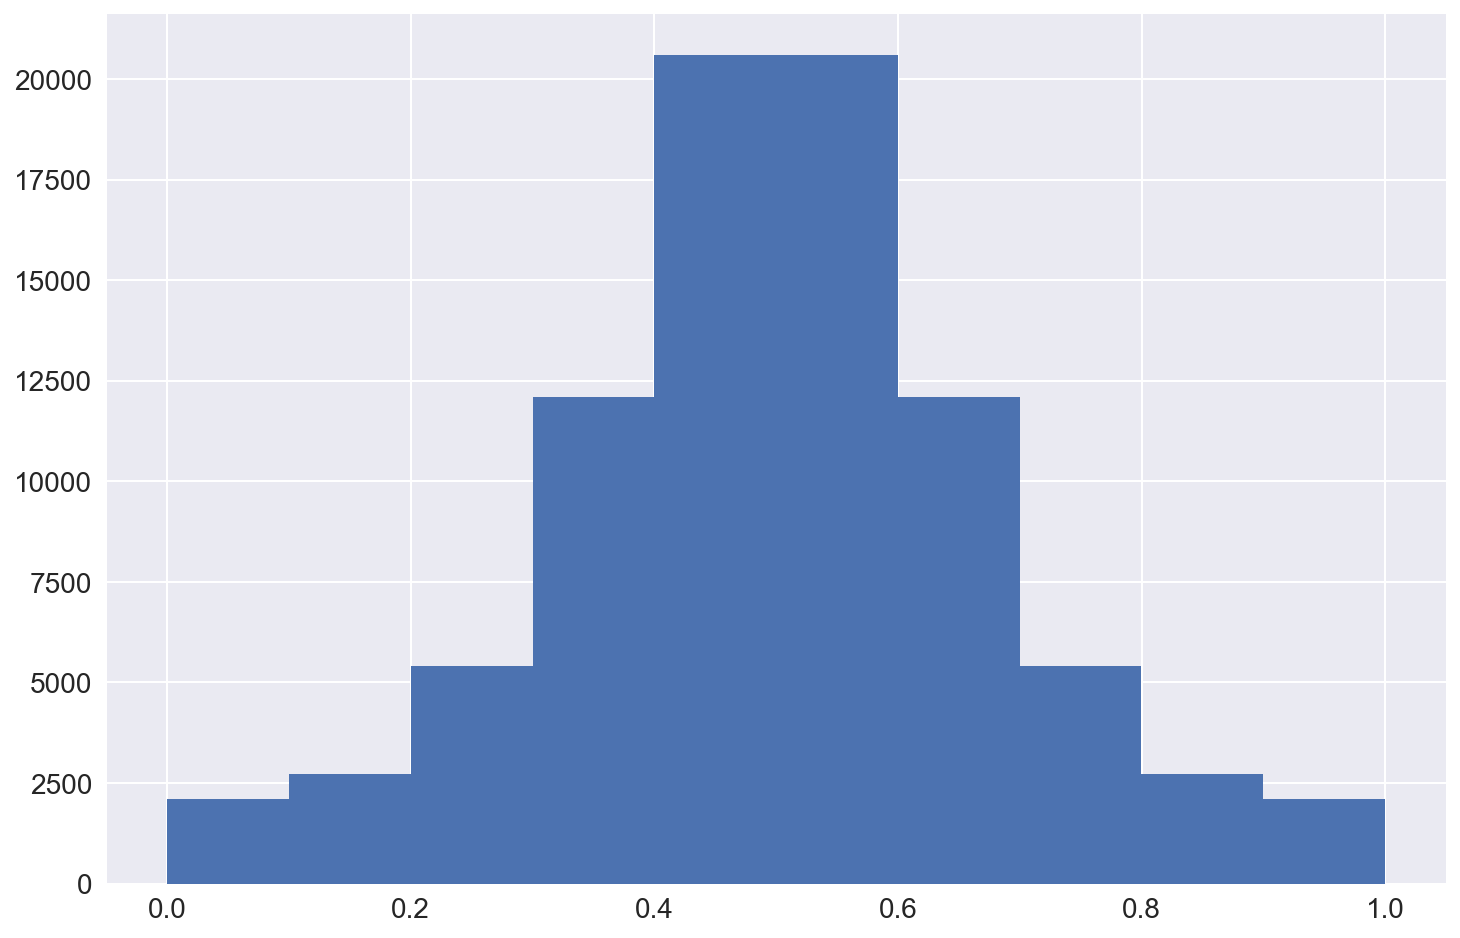

In [165]:
import matplotlib.pyplot as plt 
logreg.fit(X,y)
probs = logreg.predict_proba(X)[:, 1] 
plt.hist(probs) 
plt.show()

In [169]:
# use 0.5 cutoff for predicting 'default' 
import numpy as np 
preds = np.where(probs > 0.5, 1, 0) 
print (ConfusionMatrix(list(y), list(preds)))

  |     0     1 |
--+-------------+
0 |<28079>14845 |
1 | 14849<28075>|
--+-------------+
(row = reference; col = test)



In [170]:
# check accuracy, sensitivity, specificity 
print (metrics.accuracy_score(y, predicted)) 

0.654144534526


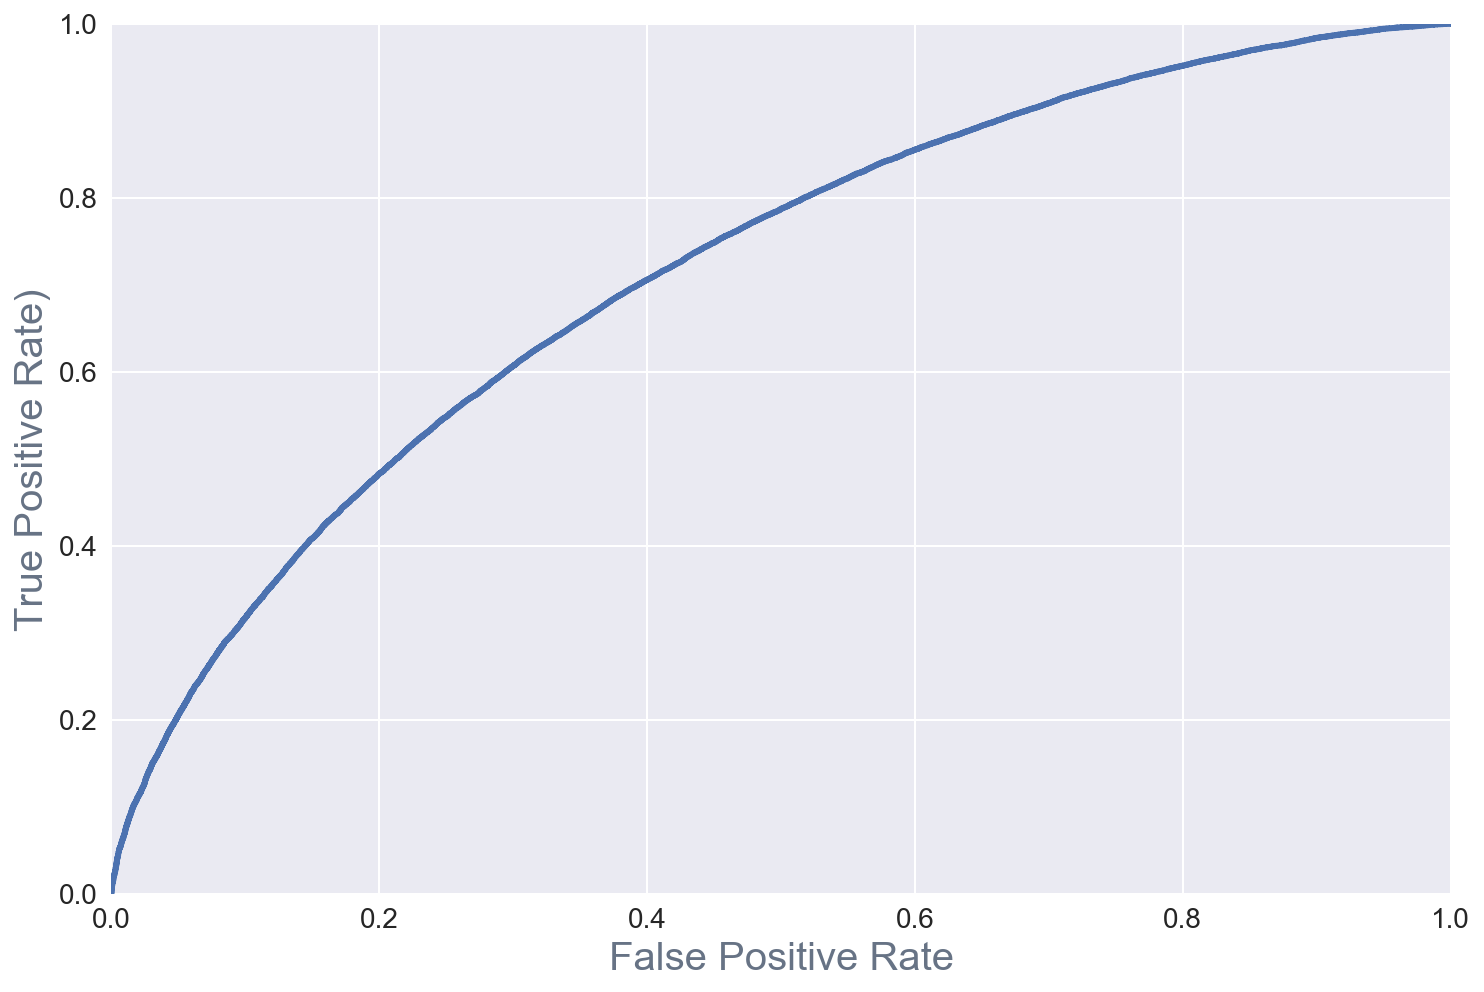

In [171]:
#ROC CURVES and AUC 
# plot ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

In [172]:
# calculate AUC 
print (metrics.roc_auc_score(y, probs))

0.715038298951


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(dtree, X, y, cv=10)
metrics.accuracy_score(y, predicted) 

0.6410521118542125

In [54]:
from sklearn.cross_validation import cross_val_score
accuracy = cross_val_score(dtree, X, y, cv=10,scoring='accuracy')
accuracy
cross_val_score(dtree, X, y, cv=10,scoring='accuracy').mean()

0.6410640516475345

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3,5,7],
              'n_estimators':[3,5,10,20,30,40],
              'criterion': ['gini', 'entropy']}
from sklearn.grid_search import GridSearchCV
rfc = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=4)

rfc.fit(X_train, y_train)

/Users/ywj/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.651084 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.652542 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=3 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=3, score=0.656020 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.651462 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................
[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.652542 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=5 .....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, n_estimators=5, score=0.654379 -   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.651757 -   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.652373 -   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=10, score=0.655725 -   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.651546 -   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.652752 -   0.4s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV]  criterion=gini, max_depth=3, n_estimators=20, score=0.655809 -   0.4s
[CV] criterion=gini, max_depth=3, n_estimat

[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.652752 -   0.3s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=10, score=0.655431 -   0.2s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.651546 -   0.4s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.652373 -   0.3s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=20, score=0.655767 -   0.3s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.651420 -   0.5s
[CV] criterion=entropy, max_depth=3, n_estimators=30 .................
[CV]  criterion=entropy, max_depth=3, n_estimators=30, score=0.652457 -   0.4s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   41.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7], 'n_estimators': [3, 5, 10, 20, 30, 40], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=4)

In [56]:
print("Best score: %s" % (rfc.best_score_))
print("Best parameter set: %s" % (rfc.best_params_))

Best score: 0.6533692419906862
Best parameter set: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}


In [60]:
from sklearn.metrics import classification_report,confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
accuracy=confusion_matrix(y_test,rfc_pred).trace()/confusion_matrix(y_test,rfc_pred).sum()
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[5963 3026]
 [3167 5668]]
Accuracy: 65.25%


# Neural Network

In [63]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
X_scaled = X
X_scaled.loc[:,:] = scaled_values
X_scaled.head()

,player_hand_l,player_hand_u,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_carpet,surface_clay,surface_grass,tourney_level_A,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M
0,0.0,0.0,0.555556,0.580790,0.518874,0.487651,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.611111,0.395022,0.563811,0.493871,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.522222,0.342568,0.491013,0.502614,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.355556,0.674307,0.503595,0.498888,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.611111,0.516735,0.488916,0.505589,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# finding a best combination of hidden nodes number and alpha using 5-fold cross validation
alphaList = [0.001,0.01,0.1,1,10]
numNodesList = [10,20,30]
ccr = pd.DataFrame(({"alpha":[],"numNodes":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for alpha in alphaList:
    for numNodes in numNodesList:
        nn = MLPClassifier(hidden_layer_sizes=numNodes, activation="logistic", alpha=alpha, solver="lbfgs", random_state=1)
        nn.fit(X_scaled,y)
        scores = cross_val_score(nn, X_scaled, y, cv=kfold)
        ccr = ccr.append(pd.Series((alpha, numNodes, scores.mean()), index=["alpha", "numNodes", "score"]), ignore_index=True)
        print(str(alpha)+" "+str(numNodes)+" finished")

ccr[ccr.score == ccr.score.max()]
#ccr.to_csv("ccr_neural_network",index=False,encoding="utf-8")

0.001 10 finished
0.001 20 finished
0.001 30 finished
0.01 10 finished
0.01 20 finished
0.01 30 finished
0.1 10 finished
0.1 20 finished
0.1 30 finished
1 10 finished
1 20 finished
1 30 finished
10 10 finished
10 20 finished
10 30 finished


,alpha,numNodes,score
3,0.01,10.0,0.498777


In [84]:
# neural network with alpha = 0.01, one hidden layer with 10 hidden nodes, logistic form for both hidden and output layer
ccr

,alpha,numNodes,score
0,0.001,10.0,0.497319
1,0.001,20.0,0.495007
2,0.001,30.0,0.492639
3,0.010,10.0,0.498777
4,0.010,20.0,0.495422
5,0.010,30.0,0.492785
6,0.100,10.0,0.497700
7,0.100,20.0,0.496342
8,0.100,30.0,0.492325
9,1.000,10.0,0.494536


In [85]:
nn = MLPClassifier(hidden_layer_sizes=10,activation="logistic",alpha=0.01,solver="lbfgs",random_state=1)
nn.fit(X_scaled,y)
cross_val_score(nn, X_scaled, y, cv=kfold)

array([0.45971724, 0.45264811, 0.50145871, 0.54252693, 0.54219031,
       0.4552289 , 0.45550443, 0.50050499, 0.53697677, 0.54101672])

In [105]:
# Save Model Using Pickle
import pandas as od
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

dataframe = pd.read_csv('train_data.csv')
X = dataframe.drop(['result'], axis=1)
X = X.drop(X.columns[0],axis=1)
Y = dataframe['result']

In [106]:
X.head()

,player_ht_diff,player_age_diff,player_rank_diff,player_rank_points_diff,surface_clay,surface_grass,surface_hard,tourney_level_A,tourney_level_G,tourney_level_M
0,5.0,3.145791,63.0,-411.0,1,0,0,1,0,0
1,10.0,-4.087611,213.0,-204.0,1,0,0,1,0,0
2,2.0,-6.130048,-30.0,87.0,1,0,0,1,0,0
3,-13.0,6.787132,12.0,-37.0,1,0,0,1,0,0
4,10.0,0.651608,-37.0,186.0,1,0,0,1,0,0


In [107]:
model = LogisticRegression()
logreg = model.fit(X, Y)

# save the model to disk
#filename = 'finalized_model.pickle'
#pickle.dump(logreg, open(filename, 'wb'))

In [109]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)